In [1]:
#hide
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

In [2]:
import os
os.chdir('../')
os.getcwd()

'/home/member/atom/ball_detection'

In [3]:
from rich.progress import track
from ball_detection.dataset import XMLDetectionDataset
import numpy as np

data_dir = './data/videoframes' # path to data
dataset = XMLDetectionDataset(root=data_dir)

print('Samples found:', len(dataset))

Samples found: 1172


In [4]:
from pathlib import Path

dataset.xml_files = sorted(Path('./data/Annotations/').glob('*.xml'))

In [5]:
import re
import matplotlib.pyplot as plt
from PIL import Image

for idx, (im, ll) in track(enumerate(dataset), total=len(dataset)):
    if idx == 596:
        break
    string = ll['annotation']['filename']
    filenumber = int(re.search(r'\d+', string).group())
    im, _ = dataset[filenumber]
    
    bbox = dataset.parse_bboxes(ll)[0]
    x, y = np.mean((bbox[1],bbox[3]),dtype=int), np.mean((bbox[0],bbox[2]) ,dtype=int)
    roi = im[x-25:x+25, y-25:y+25]
    if roi.shape == (50, 50, 3):
        x = Image.fromarray(roi)
        x.save(f'./data/ball_region/{idx:05d}.png')


Output()

In [23]:
import numpy as np
import cv2 as cv
import cv2
import argparse
import glob

import os
os.system('rm -rf ./nbs/MIRU/outputs/ball_out2')
os.mkdir('./nbs/MIRU/outputs/ball_out2')

# params for Shi-Tomasi corner detection
feature_params = dict(
    maxCorners = 100,
    qualityLevel = 0.3,
    minDistance = 7,
    blockSize = 3 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (5,5),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

files = sorted(glob.glob('./nbs/MIRU/outputs/ball_out/*.jpg'))
for idx, imgfile in enumerate(files):
    if imgfile == files[0]:
        imgfile = str(imgfile)
        img = cv2.imread(imgfile)

        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        p0 = cv.goodFeaturesToTrack(img_gray, mask = None, **feature_params)
        # Create a mask image for drawing purposes
        mask = np.zeros_like(img)
    else:
        imgfile = str(imgfile)
        frame = cv2.imread(imgfile)

        frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        # calculate optical flow
        p1, st, err = cv.calcOpticalFlowPyrLK(img_gray, frame_gray, p0, None, **lk_params)
        # Select good points
        if p1 is not None:
            good_new = p1[st==1]
            good_old = p0[st==1]
        # draw the tracks
        for i,(new,old) in enumerate(zip(good_new, good_old)):
            a,b = new.ravel()
            c,d = old.ravel()
            mask = cv.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
            frame = cv.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
            
        img = cv.add(frame,mask)
        
        cv.imwrite(f'./nbs/MIRU/outputs/ball_out2/{idx-1:06d}.png',img)
        # Now update the previous frame and previous points
        img_gray = frame_gray.copy()
        p0 = good_new.reshape(-1,1,2)


not found


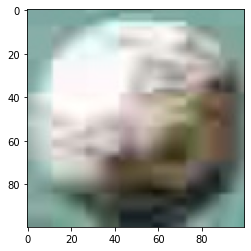

In [27]:
import cv2 as cv
filename = '../data/ball_sample2.png'

# Loads an image
src = cv.imread(cv.samples.findFile(files[0]), cv.IMREAD_COLOR)
h, w, _ = src.shape

gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)


gray = cv.medianBlur(gray, 1)


rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, max(h,w),
                           param1=100, param2=10,
                           minRadius=min(h,w)//4, maxRadius=max(h,w)//2)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(src, center, radius, (255, 0, 255), 1)
else:
    print('not found')
    
plt.imshow(src)

In [26]:
circles

array([[[52, 44, 43]]], dtype=uint16)

In [7]:
# params for Shi-Tomasi corner detection
feature_params = dict(
    maxCorners = 100,
    qualityLevel = 0.3,
    minDistance = 7,
    blockSize = 3 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (5,5),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

for idx, imgfile in enumerate(files[556:]):
    if idx == 0:
        imgfile = str(imgfile)
        img = cv2.imread(imgfile)

        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        p0 = cv.goodFeaturesToTrack(img_gray, mask = None, **feature_params)
        # Create a mask image for drawing purposes
        mask = np.zeros_like(img)
    else:
        imgfile = str(imgfile)
        frame = cv2.imread(imgfile)

        frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        # calculate optical flow
        p1, st, err = cv.calcOpticalFlowPyrLK(img_gray, frame_gray, p0, None, **lk_params)
        # Select good points
        if p1 is not None:
            good_new = p1[st==1]
            good_old = p0[st==1]
        # draw the tracks
        for i,(new,old) in enumerate(zip(good_new, good_old)):
            a,b = new.ravel()
            c,d = old.ravel()
            mask = cv.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
            frame = cv.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
            
        img = cv.add(frame,mask)
        
        cv.imwrite(f'data/klt_out2/{idx-1:06d}.png',img)
        # Now update the previous frame and previous points
        img_gray = frame_gray.copy()
        p0 = good_new.reshape(-1,1,2)
